In [15]:
# Evaluate predicted value (y_hats) for each methods.
# import external packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# import internal modules
# sys.path.insert(1, '../')
sys.path.insert(1, "/mnt/d/0ngoing/thesis/repo/src/")
from utils.accuracy import *
from utils.dm_test import dm_test

In [2]:
repo_path = "/mnt/d/0ngoing/thesis/repo/"
# read y_hats_all.csv
y_hats_all =  pd.read_csv(repo_path + "assets/y_hats/y_hats_all.csv", index_col=[0, 1, 2])
y_hats_all

y_test    y_hat_rw   y_hat_srw  y_hat_sarima_br  \
企業名   会計年度 四半期                                                        
あらた   2018 Q1   105.420000   69.340000  121.170000       122.565740   
           Q2    90.440000  105.420000   90.920000        79.897110   
           Q3   106.240000   90.440000  119.880000       119.386680   
           Q4    99.220000  106.240000   69.340000        60.222049   
      2019 Q1   116.850000   99.220000  105.420000       127.203963   
...                    ...         ...         ...              ...   
ｅＢＡＳＥ 2019 Q4    18.657982    5.290000   36.976728        51.406785   
      2020 Q1     2.010000   18.657982    3.090000       -68.232333   
           Q2     3.810000    2.010000   11.840000        19.227708   
           Q3     3.070000    3.810000    5.290000      -317.707192   
           Q4     9.989365    3.070000   18.657982        34.835646   

                y_hat_sarima_f  y_hat_sarima_g   y_hat_uen   y_hat_ul1  \
企業名   会計年度 四半期                                                           
あらた   2018 Q1       122.449521      130.595361   91.794110  114.921869   
           Q2        79.998967       94.544504   85.372422   85.174564   
           Q3       119.551232      119.287623   92.288894  108.396646   
           Q4        59.996949       65.424073   86.819024   93.029132   
      2019 Q1       125.133255      126.004465   96.812369  107.530710   
...                        ...             ...         ...         ...   
ｅＢＡＳＥ 2019 Q4        36.300485       88.758959  133.635183  133.635183   
      2020 Q1        -0.020788     -980.636406   51.945503   51.945503   
           Q2        11.637899     -201.877901   21.310432   21.310432   
           Q3         3.736002     -249.404402   20.893796   20.893796   
           Q4        18.235485       72.472296    6.097895    6.097895   

                 y_hat_ul2  y_hat_uraf  ...   y_hat_ml2  y_hat_mraf  \
企業名   会計年度 四半期                          ...                           
あらた   2018 Q1   126.523471  114.034250  ...   91.344897   82.856600   
           Q2    91.008450   98.785710  ...   68.829978   99.204700   
           Q3   117.662513  110.824080  ...   83.864665  102.953600   
           Q4    95.430889   82.645890  ...   74.001428   78.410900   
      2019 Q1   112.568429  110.090170  ...  115.839824   95.957400   
...                    ...         ...  ...         ...         ...   
ｅＢＡＳＥ 2019 Q4   133.635183   44.302038  ...   20.836984   21.818609   
      2020 Q1    51.945503    8.061015  ...    2.026227    9.017779   
           Q2    21.310432   18.531100  ...    4.295463   17.455577   
           Q3    20.893796    6.365280  ...    2.725399    5.576239   
           Q4     6.097895   19.584633  ...   10.182894   10.618090   

                y_hat_mmlp  y_hat_comb_all  y_hat_comb_uall  y_hat_comb_uts  \
企業名   会計年度 四半期                                                                
あらた   2018 Q1    60.607697      114.355855       112.465213      113.224124   
           Q2    75.818980       96.017204        89.587312       90.156116   
           Q3    61.267445       92.120862       111.220263      113.709107   
           Q4    66.711740       76.958490        79.850392       72.244614   
      2019 Q1   108.427100      113.292128       112.362602      116.596337   
...                    ...             ...              ...             ...   
ｅＢＡＳＥ 2019 Q4   -37.442333      104.851696        52.516914       43.746591   
      2020 Q1    -7.081633      -69.200244      -131.736782     -205.428309   
           Q2     4.746031      -37.216043      -121.412890      -31.432459   
           Q3  -235.246170      -55.152296       -78.499024     -110.855119   
           Q4    34.971806        8.905974         0.832331       29.454282   

                y_hat_comb_uml  y_hat_comb_mall  y_hat_comb_mols  \
企業名   会計年度 四半期                                                     
あらた   2018 Q1       111.706302       116.7191

# 企業別予測精度指標

In [3]:
# primal accuracy table for paper
model_list = [
    'y_hat_rw', 
    'y_hat_srw', 
    'y_hat_sarima_f', 
    'y_hat_sarima_g', 
    'y_hat_sarima_br',
    'y_hat_ols1', 
    'y_hat_ols2',
    'y_hat_ols3',
    'y_hat_ul2',
    'y_hat_ul1',
    'y_hat_uen',        
    'y_hat_uraf',
    'y_hat_umlp',
    'y_hat_ml2',
    'y_hat_ml1',
    'y_hat_men',
    'y_hat_mraf',
    'y_hat_mmlp',
    # "y_hat_comb_all",
    # "y_hat_comb_uall",
    # "y_hat_comb_uml",
    # "y_hat_comb_mall",
    # "y_hat_comb_mml",
    ]
# y_hat_list = list(map(lambda x: y_hats_all[x], model_list))
score_list = [MAE, MAPEUB, MSPEUB, LargeErrorRate]
firm_list = list(y_hats_all.index.get_level_values(0).unique())
# y_test = y_hats_all["y_test"]

In [4]:
def map_score(test, pred, score_list):
    return list(map(lambda s: s(test, pred), score_list))

def map_model(firm, score_list, model_list):
    return list(map(lambda pred: map_score(
        y_hats_all.loc[pd.IndexSlice[firm, :, :], "y_test"], 
        y_hats_all.loc[pd.IndexSlice[firm, :, :], pred], 
        score_list
        ), model_list))

score_name=["MAE", "MAPE", "MSPE", "Large Forecast Error(%)"]
model_name=[
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
    ]

def df_single_firm(firm, score_list, model_list, score_name=score_name, model_name=model_name):
    df = pd.DataFrame(map_model(firm, score_list, model_list))
    df.columns = score_name
    df["Model"] = model_name
    df["Firm"] = firm
    return df

def map_firm(score_list, model_list, firm_list):
    a = pd.concat(list(map(lambda f: df_single_firm(f, score_list, model_list), firm_list)))
    a = a.set_index(['Firm','Model']).unstack(level="Model").reorder_levels([1, 0], axis=1)
    multi_idx = pd.MultiIndex.from_tuples([(m, s) for m in model_name for s in score_name], name=["Model", None])
    a = a.T.loc[multi_idx].T
    return a

def df2tex(df, tex_file_name):
    # print(df.to_latex())
    with open('./' + tex_file_name + '.tex', 'w') as tf:
        tf.write(df.to_latex())

In [5]:
a_by_firm = map_firm(score_list, model_list, firm_list)

a_by_firm.to_csv("appendix.csv")
df2tex(a_by_firm, "appendix")

a_by_firm

Model             U-RW                                                  U-SRW  \
                   MAE      MAPE      MSPE Large Forecast Error(%)        MAE   
Firm                                                                            
あらた          30.608046  0.285463  0.141532                8.333333  17.893879   
いすゞ自動車       22.830833  0.786755  0.685258               41.666667  10.041667   
いなげや         18.372500  0.762388  0.676729               50.000000  18.044167   
かどや製油        34.876667  0.456747  0.308482               16.666667  22.664167   
きんでん         26.589115  0.549606  0.396298               25.000000   3.649115   
...                ...       ...       ...                     ...        ...   
ＵＡＣＪ         49.135716  0.843722  0.801056               58.333333  51.553549   
ＷＤＢホールディングス   6.738301  0.199948  0.103360                8.333333   7.694967   
ＷＯＷＯＷ        61.817500  0.634861  0.537735               33.333333  31.623333   
ＺＯＺＯ          8.055000  0.493117  0.353030               16.666667   7.258333   
ｅＢＡＳＥ        12.521566  0.710243  0.566612               33.333333   6.703008   

Model                                                    U-ARIMA-F            \
                 MAPE      MSPE Large Forecast Error(%)        MAE      MAPE   
Firm                                                                           
あらた          0.167757  0.036173                0.000000  19.228381  0.199988   
いすゞ自動車       0.302058  0.163496                8.333333  10.832230  0.326381   
いなげや         0.682924  0.601615               41.666667  16.396169  0.670107   
かどや製油        0.394271  0.264813               16.666667  23.233766  0.406111   
きんでん         0.128767  0.030942                0.000000   3.697477  0.132039   
...               ...       ...                     ...        ...       ...   
ＵＡＣＪ         0.896769  0.846288               75.000000  45.213709  0.772110   
ＷＤＢホールディングス  0.201038  0.067270                0.000000   9.355318  0.242735   
ＷＯＷＯＷ        0.482434  0.332345               16.666667  30.096586  0.475661   
ＺＯＺＯ         0.435219  0.254376                0.000000   7.274589  0.431233   
ｅＢＡＳＥ        0.694854  0.582348               25.000000   6.233099  0.645831   

Model        ...      M-EN                               M-RF            \
             ...      MSPE Large Forecast Error(%)        MAE      MAPE   
Firm         ...                                                          
あらた          ...  0.063162                0.000000  20.938288  0.213090   
いすゞ自動車       ...  0.193508                8.333333  11.338900  0.407133   
いなげや         ...  0.746814               58.333333  11.442767  0.632952   
かどや製油        ...  0.407420               25.000000  22.029122  0.312809   
きんでん         ...  0.005143                0.000000   4.954196  0.207709   
...          ...       ...                     ...        ...       ...   
ＵＡＣＪ         ...  0.626746               50.000000  37.148711  0.817226   
ＷＤＢホールディングス  ...  0.085410                0.000000   4.829996  0.141213   
ＷＯＷＯＷ        ...  0.633538               41.666667  99.348901  0.635789   
ＺＯＺＯ         ...  0.348641               25.000000   7.578284  0.446821   
ｅＢＡＳＥ        ...  0.325218               16.666667  11.036763  0.639525   

Model                                                M-NN                      \
                 MSPE Large Forecast Error(%)         MAE      MAPE      MSPE   
Firm                                                                            
あらた          0.084499                0.000000   26.378724  0.280263  0.141277   
いすゞ自動車       0.282712               16.666667   16.599370  0.505748  0.347846   
いなげや         0.504164               16.666667   21.167434  0.831949  0.752361   
かどや製油        0.203897               16.666667   31.415551  0.474314  0.331268   
きんでん         0.117585                0.000000    7.302862  0.232925  0.093431   
...               ...                     ...

In [6]:
# read y_hats_all_vsibes.csv
y_hats_all_vsibes =  pd.read_csv(repo_path + "assets/y_hats/y_hats_all_vsibes.csv", index_col=[0, 1, 2])
y_hats_all_vsibes

y_test  y_hat_rw  y_hat_srw  y_hat_sarima_br  \
企業名    会計年度 四半期                                                    
いすゞ自動車 2018 Q1   48.380000     27.74      41.69        33.194516   
            Q2   24.150000     48.38      25.17        28.366444   
            Q3   50.860000     24.15      39.57        38.824756   
            Q4   26.430000     50.86      27.74        36.040824   
       2019 Q1   37.130000     26.43      48.38        43.788193   
...                    ...       ...        ...              ...   
ＴＯＷＡ   2019 Q4   11.580000     11.21      13.47        20.687856   
       2020 Q1    8.260000     11.58     -19.92         6.524577   
            Q2   27.300000      8.26      11.87        22.013448   
            Q3   35.290000     27.30      11.21        12.649111   
            Q4   35.707105     35.29      11.58        29.574206   

                 y_hat_sarima_f  y_hat_sarima_g  y_hat_uen  y_hat_ul1  \
企業名    会計年度 四半期                                                         
いすゞ自動車 2018 Q1        39.930566       36.294894  22.903221  22.903221   
            Q2        28.002100       29.226981  23.555935  23.555935   
            Q3        39.095560       41.291053  25.425477  25.425477   
            Q4        32.019464       41.555242  25.164969  25.164969   
       2019 Q1        47.922773       47.508122  28.102749  28.102749   
...                         ...             ...        ...        ...   
ＴＯＷＡ   2019 Q4        25.432088        6.516588  20.743279  23.975295   
       2020 Q1       -20.795096        1.010510  16.115858  15.551147   
            Q2        23.338850       16.411733  13.583803  13.142713   
            Q3        18.455527       10.216570  18.402950  19.186618   
            Q4        23.366923       32.204562  25.663370  28.777520   

                 y_hat_ul2  y_hat_uraf  ...  y_hat_mraf  y_hat_mmlp  \
企業名    会計年度 四半期                         ...                           
いすゞ自動車 2018 Q1   32.399487   35.138701  ...   33.855803   36.510580   
            Q2   33.581439   26.268701  ...   30.480000   29.579592   
            Q3   34.983208   33.228882  ...   34.235600   27.467480   
            Q4   31.301852   27.495381  ...   31.043200   39.467580   
       2019 Q1   44.562692   42.959661  ...   37.613000   49.485010   
...                    ...         ...  ...         ...         ...   
ＴＯＷＡ   2019 Q4   23.986382   21.389970  ...   10.404780   26.150269   
       2020 Q1   16.485428   16.865477  ...    5.824640   20.017757   
            Q2   13.276477   11.136205  ...   16.906080   17.632080   
            Q3   19.310222   18.382001  ...   28.539140   27.898632   
            Q4   28.977377   29.044080  ...   32.296280   36.403990   

                 y_hat_comb_all  y_hat_comb_uall  y_hat_comb_uml  \
企業名    会計年度 四半期                                                    
いすゞ自動車 2018 Q1        28.027377        31.440696       26.029071   
            Q2        28.331216        29.628064       26.876764   
            Q3        34.674839        34.327848       31.504816   
            Q4        34.324895        32.511615       26.097251   
       2019 Q1        40.984437        39.362850       35.059140   
...                         ...              ...             ...   
ＴＯＷＡ   2019 Q4        17.386293        20.163488       26.038714   
       2020 Q1        10.520304         3.692765       13.708723   
            Q2        13.343851        15.221215       13.774225   
            Q3        23.337187        18.985557       22.759701   
            Q4        31.746301        28.015361       30.030641   

                 y_hat_comb_mall  y_hat_comb_mml  y_hat_ibes  \
企業名    会計年度 四半期                                                
いすゞ自動車 2018 Q1         23.298478       35.058565        37.4   
            Q2         27.130075       31.486082        32.6   
            Q3         35.245948       40.777408        48.6   
            Q4         37.218523       36.824444        

In [7]:
ibes_firm_list = y_hats_all_vsibes.index.get_level_values(0).unique()
l1 = []
for f in ibes_firm_list:
    l2 = []
    for s in score_list:
        l2.append(s(y_hats_all_vsibes.loc[pd.IndexSlice[f, :, :], "y_test"], y_hats_all_vsibes.loc[pd.IndexSlice[f, :, :], "y_hat_ibes"]))
    l1.append(l2)

a_by_firm_ibes = pd.DataFrame(l1)
a_by_firm_ibes.columns = score_name
a_by_firm_ibes["Model"] = "IBES"
a_by_firm_ibes.index = ibes_firm_list
a_by_firm_ibes.index.name = "Firm"
a_by_firm_ibes = a_by_firm_ibes.reset_index().set_index(["Firm", "Model"]).unstack(level="Model").reorder_levels([1, 0], axis=1)

In [8]:
a_by_firm = pd.concat([a_by_firm, a_by_firm_ibes], axis=1)

In [9]:
# round float
a_by_firm.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]] = a_by_firm.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]].round(1)

a_by_firm.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]] = a_by_firm.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]].round(3)
a_by_firm = a_by_firm.fillna("-")

In [10]:
a_by_firm

Model        U-RW                                       U-SRW                \
              MAE   MAPE   MSPE Large Forecast Error(%)   MAE   MAPE   MSPE   
Firm                                                                          
あらた          30.6  0.285  0.142                     8.3  17.9  0.168  0.036   
いすゞ自動車       22.8  0.787  0.685                    41.7  10.0  0.302  0.163   
いなげや         18.4  0.762  0.677                    50.0  18.0  0.683  0.602   
かどや製油        34.9  0.457  0.308                    16.7  22.7  0.394  0.265   
きんでん         26.6  0.550  0.396                    25.0   3.6  0.129  0.031   
...           ...    ...    ...                     ...   ...    ...    ...   
ＵＡＣＪ         49.1  0.844  0.801                    58.3  51.6  0.897  0.846   
ＷＤＢホールディングス   6.7  0.200  0.103                     8.3   7.7  0.201  0.067   
ＷＯＷＯＷ        61.8  0.635  0.538                    33.3  31.6  0.482  0.332   
ＺＯＺＯ          8.1  0.493  0.353                    16.7   7.3  0.435  0.254   
ｅＢＡＳＥ        12.5  0.710  0.567                    33.3   6.7  0.695  0.582   

Model                               U-ARIMA-F         ...   M-RF  \
            Large Forecast Error(%)       MAE   MAPE  ...   MSPE   
Firm                                                  ...          
あらた                             0.0      19.2  0.200  ...  0.084   
いすゞ自動車                          8.3      10.8  0.326  ...  0.283   
いなげや                           41.7      16.4  0.670  ...  0.504   
かどや製油                          16.7      23.2  0.406  ...  0.204   
きんでん                            0.0       3.7  0.132  ...  0.118   
...                             ...       ...    ...  ...    ...   
ＵＡＣＪ                           75.0      45.2  0.772  ...  0.760   
ＷＤＢホールディングス                     0.0       9.4  0.243  ...  0.064   
ＷＯＷＯＷ                          16.7      30.1  0.476  ...  0.559   
ＺＯＺＯ                            0.0       7.3  0.431  ...  0.355   
ｅＢＡＳＥ                          25.0       6.2  0.646  ...  0.543   

Model                                 M-NN                \
            Large Forecast Error(%)    MAE   MAPE   MSPE   
Firm                                                       
あらた                             0.0   26.4  0.280  0.141   
いすゞ自動車                         16.7   16.6  0.506  0.348   
いなげや                           16.7   21.2  0.832  0.752   
かどや製油                          16.7   31.4  0.474  0.331   
きんでん                            0.0    7.3  0.233  0.093   
...                             ...    ...    ...    ...   
ＵＡＣＪ                           58.3   55.2  0.957  0.926   
ＷＤＢホールディングス                     0.0   40.9  0.744  0.671   
ＷＯＷＯＷ                          41.7  731.8  0.839  0.787   
ＺＯＺＯ                           25.0   22.2  0.583  0.471   
ｅＢＡＳＥ                          25.0   67.7  0.898  0.862   

Model                                IBES                \
            Large Forecast Error(%)   MAE   MAPE   MSPE   
Firm                                                      
あらた                             0.0     -      -      -   
いすゞ自動車                         25.0  10.0  0.366  0.211   
いなげや                           41.7     -      -      -   
かどや製油                          16.7     -      -      -   
きんでん                            0.0     -      -      -   
...                             ...   ...    ...    ...   
ＵＡＣＪ                           83.3     -      -      -   
ＷＤＢホールディングス                    50.0     -      -      -   
ＷＯＷＯＷ                          66.7     -      -      -   
ＺＯＺＯ                           41.7     -      -      -   
ｅＢＡＳＥ                          83.3     -      -      -   

Model                                
            Large Forecast Error(%)  
Firm                                 
あらた                               -  
いすゞ自動車                          8.3  
いなげや                              -  
かどや製油                             -  
きんでん  

In [11]:
a_by_firm.to_csv("accuracy_by_firm.csv")
df2tex(a_by_firm, "accuracy_by_firm")

In [13]:
a_by_firm_MAE = a_by_firm.T.loc[pd.IndexSlice[:, "MAE"], :].swaplevel(1, 0).T["MAE"]
a_by_firm_MAE.to_csv("accuracy_by_firm_MAE.csv")
df2tex(a_by_firm_MAE, "accuracy_by_firm_MAE")

a_by_firm_MAE = a_by_firm.T.loc[pd.IndexSlice[:, "MAPE"], :].swaplevel(1, 0).T["MAPE"]
a_by_firm_MAE.to_csv("accuracy_by_firm_MAPE.csv")
df2tex(a_by_firm_MAE, "accuracy_by_firm_MAPE")

a_by_firm_MAE = a_by_firm.T.loc[pd.IndexSlice[:, "MSPE"], :].swaplevel(1, 0).T["MSPE"]
a_by_firm_MAE.to_csv("accuracy_by_firm_MSPE.csv")
df2tex(a_by_firm_MAE, "accuracy_by_firm_MSPE")

a_by_firm_MAE = a_by_firm.T.loc[pd.IndexSlice[:, "Large Forecast Error(%)"], :].swaplevel(1, 0).T["Large Forecast Error(%)"]
a_by_firm_MAE.to_csv("accuracy_by_firm_LFE.csv")
df2tex(a_by_firm_MAE, "accuracy_by_firm_LFE")

# 組み合わせ予測

In [16]:
model_list = [
    # 'y_hat_rw', 
    # 'y_hat_srw', 
    # 'y_hat_sarima_f', 
    # 'y_hat_sarima_g', 
    # 'y_hat_sarima_br',
    # 'y_hat_ols1', 
    # 'y_hat_ols2',
    # 'y_hat_ols3',
    # 'y_hat_ul2',
    # 'y_hat_ul1',
    # 'y_hat_uen',        
    # 'y_hat_uraf',
    # 'y_hat_umlp',
    # 'y_hat_ml2',
    # 'y_hat_ml1',
    # 'y_hat_men',
    # 'y_hat_mraf',
    # 'y_hat_mmlp',
    "y_hat_comb_all",
    "y_hat_comb_uall",
    "y_hat_comb_uts",
    "y_hat_comb_uml",
    "y_hat_comb_mall",
    "y_hat_comb_mols",
    "y_hat_comb_mml",
    ]
y_hat_list = list(map(lambda x: y_hats_all[x], model_list))
q_list = ["Q1", "Q2", "Q3", "Q4", ["Q1", "Q2", "Q3", "Q4"]]
score_list = [MAE, MAPEUB, MSPEUB, LargeErrorRate]    

a_by_q_comb = []
for y_hat in y_hat_list:
    by_q = []
    for q in q_list:
        by_q.append(list(map(lambda s: s(y_hats_all["y_test"].loc[pd.IndexSlice[:, :, q]], y_hat.loc[pd.IndexSlice[:, :, q]]), score_list)))
    a_by_q_comb.append(np.array(by_q).flatten())

a_by_q_comb = pd.DataFrame(a_by_q_comb)
a_by_q_comb.index = model_list

col = [(i, j) for i in ["Q1", "Q2", "Q3", "Q4", "Overall"] for j in ["MAE", "MAPE", "MSPE", "Large Forecast Error(%)"]]
a_by_q_comb.columns = pd.MultiIndex.from_tuples(col)
a_by_q_comb.to_csv(repo_path + "/assets/y_hats/accuracy_table_by_quarter_comb.csv")

In [18]:
model_name_tex = [
    "COMB-ALL",
    "COMB-U-ALL",
    "COMB-U-TS",
    "COMB-U-ML",
    "COMB-M-ALL",
    "COMB-M-OLS",
    "COMB-M-ML",
    ]

a_by_q_comb.index = model_name_tex
a_by_q_comb.index.name = "Model"

a_by_q_comb

Q1                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
COMB-ALL     38.034800  0.554190  0.446898               31.472250   
COMB-U-ALL   29.538138  0.548011  0.435366               29.079428   
COMB-U-TS    29.806567  0.548737  0.437932               30.043204   
COMB-U-ML    34.070486  0.564751  0.451545               30.741110   
COMB-M-ALL   58.499529  0.590099  0.486502               35.427052   
COMB-M-OLS  129.970900  0.697532  0.618969               50.780990   
COMB-M-ML    24.220272  0.487402  0.370736               23.130608   

                    Q2                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
COMB-ALL     30.380462  0.478976  0.364798               24.493187   
COMB-U-ALL   25.667016  0.470938  0.344634               20.073114   
COMB-U-TS    23.969132  0.459826  0.337887               20.272516   
COMB-U-ML    30.616147  0.502312  0.373736               22.864739   
COMB-M-ALL   47.241036  0.532727  0.428554               31.006979   
COMB-M-OLS  106.651765  0.657846  0.568948               45.197740   
COMB-M-ML    23.181048  0.420813  0.304999               18.876703   

                    Q3                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
COMB-ALL     31.541570  0.473424  0.353453               22.299767   
COMB-U-ALL   26.561023  0.454478  0.328668               19.076105   
COMB-U-TS    25.737645  0.457428  0.335539               20.305749   
COMB-U-ML    31.389080  0.484089  0.349811               19.375208   
COMB-M-ALL   46.895350  0.518349  0.406811               27.916251   
COMB-M-OLS  101.578980  0.650461  0.555850               42.173480   
COMB-M-ML    22.999708  0.407274  0.287219               17.048853   

                    Q4                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
COMB-ALL     44.032707  0.551085  0.438359               29.577933   
COMB-U-ALL   41.697296  0.553703  0.439015               28.780326   
COMB-U-TS    42.869554  0.551916  0.439283               29.312064   
COMB-U-ML    45.140754  0.575739  0.457893               29.544699   
COMB-M-ALL   54.991265  0.575920  0.470771               33.798604   
COMB-M-OLS  102.347812  0.679819  0.592426               46.826188   
COMB-M-ML    36.219633  0.499015  0.385112               25.124626   

               Overall                                              
                   MAE      MAPE      MSPE Large Forecast Error(%)  
Model                                                               
COMB-ALL     35.997385  0.514419  0.400877               26.960784  
COMB-U-ALL   30.865868  0.506783  0.386921               24.252243  
COMB-U-TS    30.595725  0.504477  0.387660               24.983383  
COMB-U-ML    35.304117  0.531723  0.408246               25.631439  
COMB-M-ALL   51.906795  0.554274  0.448160               32.037222  
COMB-M-OLS  110.137364  0.671415  0.584048               46.244600  
COMB-M-ML    26.655165  0.453626  0.337016               21.045198

In [19]:
# round float
a_by_q_comb.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]] = a_by_q_comb.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]].round(1)

a_by_q_comb.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]] = a_by_q_comb.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]].round(3)

In [21]:
a_by_q_comb.to_csv("accuracy_comb.csv")
df2tex(a_by_q_comb, "accuracy_comb")

a_by_q_comb

Q1                                           Q2                \
              MAE   MAPE   MSPE Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                                          
COMB-ALL     38.0  0.554  0.447                    31.5   30.4  0.479  0.365   
COMB-U-ALL   29.5  0.548  0.435                    29.1   25.7  0.471  0.345   
COMB-U-TS    29.8  0.549  0.438                    30.0   24.0  0.460  0.338   
COMB-U-ML    34.1  0.565  0.452                    30.7   30.6  0.502  0.374   
COMB-M-ALL   58.5  0.590  0.487                    35.4   47.2  0.533  0.429   
COMB-M-OLS  130.0  0.698  0.619                    50.8  106.7  0.658  0.569   
COMB-M-ML    24.2  0.487  0.371                    23.1   23.2  0.421  0.305   

                                       Q3                \
           Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                     
COMB-ALL                      24.5   31.5  0.473  0.353   
COMB-U-ALL                    20.1   26.6  0.454  0.329   
COMB-U-TS                     20.3   25.7  0.457  0.336   
COMB-U-ML                     22.9   31.4  0.484  0.350   
COMB-M-ALL                    31.0   46.9  0.518  0.407   
COMB-M-OLS                    45.2  101.6  0.650  0.556   
COMB-M-ML                     18.9   23.0  0.407  0.287   

                                       Q4                \
           Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                     
COMB-ALL                      22.3   44.0  0.551  0.438   
COMB-U-ALL                    19.1   41.7  0.554  0.439   
COMB-U-TS                     20.3   42.9  0.552  0.439   
COMB-U-ML                     19.4   45.1  0.576  0.458   
COMB-M-ALL                    27.9   55.0  0.576  0.471   
COMB-M-OLS                    42.2  102.3  0.680  0.592   
COMB-M-ML                     17.0   36.2  0.499  0.385   

                                   Overall                \
           Large Forecast Error(%)     MAE   MAPE   MSPE   
Model                                                      
COMB-ALL                      29.6    36.0  0.514  0.401   
COMB-U-ALL                    28.8    30.9  0.507  0.387   
COMB-U-TS                     29.3    30.6  0.504  0.388   
COMB-U-ML                     29.5    35.3  0.532  0.408   
COMB-M-ALL                    33.8    51.9  0.554  0.448   
COMB-M-OLS                    46.8   110.1  0.671  0.584   
COMB-M-ML                     25.1    26.7  0.454  0.337   

                                    
           Large Forecast Error(%)  
Model                               
COMB-ALL                      27.0  
COMB-U-ALL                    24.3  
COMB-U-TS                     25.0  
COMB-U-ML                     25.6  
COMB-M-ALL                    32.0  
COMB-M-OLS                    46.2  
COMB-M-ML                     21.0

# DM検定

In [6]:
def dm_table(y_hats, method_1, method_2, crit="MAPE"):
    firm_list = y_hats.index.get_level_values(0).unique()
    firm_list = list(firm_list)

    def dm_test_i(firm, crit=crit):
        firm_slice = y_hats.loc[pd.IndexSlice[firm, :, :], :]
        return dm_test(firm_slice["y_test"], firm_slice[method_1], firm_slice[method_2], h=1, crit=crit)

    dm_results = list(map(dm_test_i, firm_list))

    dm = pd.DataFrame(dm_results, index=firm_list)
    # ac_i = pd.read_csv("../assets/y_hats/accuracy_table_i.csv", index_col=[0, 1])
    # crit_i = ac_i.loc[pd.IndexSlice[:, crit], [method_1, method_2]]
    # crit_i.index = firm_list
    # dm = pd.concat([dm, crit_i], axis=1)
    def sig_level(x):
        sig_level = None
        if x <= 0.01:
            sig_level = "0.01"
        elif (0.01 < x) & (x <= 0.05):
            sig_level = "0.05"
        elif (0.05 < x) & (x <= 0.10):
            sig_level = "0.10"
        else:
            sig_level = "not stat sig"
        return sig_level
    dm["sig_level"] = dm["p_value"].apply(sig_level)
    return dm

def dm_stats_hist(method_1, method_2, y_hats, bins=35):
    dm_mape = dm_table(y_hats, method_1, method_2, crit="MAPE")

    # pivot and plot
    dm_mape.pivot(columns="sig_level", values="DM").plot.hist(bins=bins, figsize=(16, 9))
    plt.xlabel("DM stat")
    plt.ylabel("firm count")
    plt.legend()
    plt.title("DM-test (" + str(len(dm_mape)) + " firms) results: (1) " + method_1 + " vs. (2) " + method_2)
    plt.show()

    p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
    p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
    p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
    p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
    p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
    p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
    p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
    p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
    print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

def dm_integrated_table(method_1, m2_list, y_hats, crit="MAPE"):
    # Create Table
    dm_test_p = pd.DataFrame()
    l = []
    for i in m2_list:
        method_2 = i
        pair = "(1) " + method_1 + " vs " + "(2) " + method_2
        # pair = (method_1, method_2)

        # DM score for each firm
        dm_mape = dm_table(method_1=method_1, method_2=method_2, y_hats=y_hats, crit=crit)
        dm_mape["pair"] = pair
        dm_test_p = pd.concat([dm_test_p, dm_mape])

        # count firm for each statistic significance level
        p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
        p_5n = (dm_mape[dm_mape["p_value"] <= 0.050]["DM"] < 0).sum()
        p_10n = (dm_mape[dm_mape["p_value"] <= 0.100]["DM"] < 0).sum()
        # p_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
        # p_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
        p_10p = (dm_mape[dm_mape["p_value"] <= 0.100]["DM"] > 0).sum()
        p_5p = (dm_mape[dm_mape["p_value"] <= 0.050]["DM"] > 0).sum()
        p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
        # print(p_1n, p_5n, p_10n, p_n, "|", p_p, p_10p, p_5p, p_1p)
        # print(p_1n, p_5n, p_10n, "|", p_10p, p_5p, p_1p)
        l.append([pair, p_1n, p_5n, p_10n, p_10p, p_5p, p_1p])

    dm_test_p = dm_test_p.reset_index().set_index(["pair", "index"])

    dm_test_p_count = pd.DataFrame(l, columns=["pair", "p_1n", "p_5n", "p_10n", "p_10p", "p_5p", "p_1p"])
    dm_test_p_count = dm_test_p_count.set_index(["pair"])

    return dm_test_p, dm_test_p_count

def plot_heatmap(y_hats_all, dm_test_p_count, loss):
    num_firm = len(y_hats_all.index.get_level_values(0).unique())

    # plot count heatmap 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

    sns.heatmap(dm_test_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[0], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, cbar_kws={})
    sns.heatmap(dm_test_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False)

    fig.suptitle("DM score (loss: " + loss + "), firm counts (" + str(num_firm) + "firms) by significance level: method (1): " + m1)
    axs[0].set_title("# negative statistically significant firm")
    axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
    axs[1].set_title("# positive statistically significant firm")
    axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

    yticks = [x.split()[-1] for x in dm_test_p_count.index]
    axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

    fig.subplots_adjust(wspace=0, hspace=0)

    plt.show()

    # plot count (percentage) heatmap 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

    sns.heatmap(dm_test_p_count[["p_1n", "p_5n", "p_10n"]].values * (1/num_firm) * 100, cmap='Blues', ax=axs[0], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, cbar_kws={})
    sns.heatmap(dm_test_p_count[["p_10p", "p_5p", "p_1p"]].values * (1/num_firm) * 100, cmap='Reds', ax=axs[1], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, yticklabels=False)

    fig.suptitle("DM score (loss: " + loss + "), firm counts (percentage /" + str(num_firm) + ") by significance level: method (1): " + m1)
    axs[0].set_title("% negative statistically significant firm")
    axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
    axs[1].set_title("% positive statistically significant firm")
    axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

    yticks = [x.split()[-1] for x in dm_test_p_count.index]
    axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

    fig.subplots_adjust(wspace=0, hspace=0)

    plt.show()


# def dm_score(y_hats, method_1, method_2, crit):
#     firm_list = y_hats.index.get_level_values(0).unique()
#     firm_list = list(firm_list)

#     def dm_test_i(firm, crit=crit):
#         firm_slice = y_hats.loc[pd.IndexSlice[firm, :, :], :]
#         # only return DM score
#         return dm_test(firm_slice["y_test"], firm_slice[method_1], firm_slice[method_2], h=1, crit=crit)[0]
#     s = pd.DataFrame(data=list(map(dm_test_i, firm_list)))
#     pair = [(method_1, method_2)] * len(s)
#     # s.index = pd.MultiIndex.from_tuples(pair, names=('method_1', 'method_2'))
#     return s
     

# def dm_score_mat(method_1, m2_list, y_hats, crit):
#     # Create List
#     dm_score_mat = []
#     for i in m2_list:
#         method_2 = i
#         pair = (method_1, method_2)
#         # DM score table(for each firm)
#         dm_score_mat.append(dm_score(method_1=method_1, method_2=method_2, y_hats=y_hats, crit=crit))
#         pair_list.append(pair)
#     dm_score_mat = pd.concat(dm_score_mat)
#     return dm_score_mat

In [4]:
loss = "MAD"
# loss = "MAPE"
# loss = "MSPE"

# m1 = "y_hat_srw"
m1 = "y_hat_sarima_br"

dm_test_p, dm_test_p_count = dm_integrated_table(m1, y_hats_all.columns, y_hats_all, crit=loss)

KeyboardInterrupt: 

In [ ]:
m1_list = [
    'y_hat_rw', 'y_hat_srw', 'y_hat_sarima_f', 'y_hat_sarima_g', 'y_hat_sarima_br', 
    'y_hat_ul2', 'y_hat_ul1', 'y_hat_uen', 'y_hat_uraf', 'y_hat_umlp', 
    'y_hat_ols1', 'y_hat_ols2', 'y_hat_ols3',
    'y_hat_ml2', 'y_hat_ml1', 'y_hat_men', 'y_hat_mraf', 'y_hat_mmlp'
    ]
m2_list = m1_list

dm_score_mat = pd.concat(list(map(lambda m1: dm_integrated_table(m1, m2_list, y_hats_all, crit=loss)[0]["DM"], m1_list)))

dm_score_mat.to_csv("./dm_score_mat.csv")
dm_score_mat

pair                              index      
(1) y_hat_rw vs (2) y_hat_rw      あらた           NaN
                                  いすゞ自動車        NaN
                                  いなげや          NaN
                                  かどや製油         NaN
                                  きんでん          NaN
                                                 ..
(1) y_hat_mmlp vs (2) y_hat_mmlp  ＵＡＣＪ          NaN
                                  ＷＤＢホールディングス   NaN
                                  ＷＯＷＯＷ         NaN
                                  ＺＯＺＯ          NaN
                                  ｅＢＡＳＥ         NaN
Name: DM, Length: 324972, dtype: float64

In [4]:
dm_score_mat = pd.read_csv("./dm_score_mat.csv", index_col=[0, 1])
dm_score_mat

DM
pair                             index          
(1) y_hat_rw vs (2) y_hat_rw     あらた         NaN
                                 いすゞ自動車      NaN
                                 いなげや        NaN
                                 かどや製油       NaN
                                 きんでん        NaN
...                                           ..
(1) y_hat_mmlp vs (2) y_hat_mmlp ＵＡＣＪ        NaN
                                 ＷＤＢホールディングス NaN
                                 ＷＯＷＯＷ       NaN
                                 ＺＯＺＯ        NaN
                                 ｅＢＡＳＥ       NaN

[324972 rows x 1 columns]

In [5]:
dm = dm_score_mat.reset_index()
dm["Model 1"] = dm["pair"].str.split().apply(lambda x: x[1])
dm["Model 2"] = dm["pair"].str.split().apply(lambda x: x[4])
dm = dm.drop("pair", axis=1)

In [6]:
# replace name
original_name = [
    'y_hat_rw',
    'y_hat_srw',
    'y_hat_sarima_f',
    'y_hat_sarima_g',
    'y_hat_sarima_br',
    'y_hat_ul2',
    'y_hat_ul1',
    'y_hat_uen',
    'y_hat_uraf',
    'y_hat_umlp',
    'y_hat_ols1',
    'y_hat_ols2',
    'y_hat_ols3',
    'y_hat_ml2',
    'y_hat_ml1',
    'y_hat_men',
    'y_hat_mraf',
    'y_hat_mmlp'
    ]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN"
]

dm["Model 1"] = dm["Model 1"].replace(dict(zip(original_name, model_name_tex)))
dm["Model 2"] = dm["Model 2"].replace(dict(zip(original_name, model_name_tex)))
dm = dm.set_index(["Model 1", "Model 2"])
dm

index  DM
Model 1 Model 2                 
U-RW    U-RW             あらた NaN
        U-RW          いすゞ自動車 NaN
        U-RW            いなげや NaN
        U-RW           かどや製油 NaN
        U-RW            きんでん NaN
...                      ...  ..
M-NN    M-NN            ＵＡＣＪ NaN
        M-NN     ＷＤＢホールディングス NaN
        M-NN           ＷＯＷＯＷ NaN
        M-NN            ＺＯＺＯ NaN
        M-NN           ｅＢＡＳＥ NaN

[324972 rows x 2 columns]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

MultiIndex([('U-RW', 'U-RW')],
           names=['Model 1', 'Model 2'])


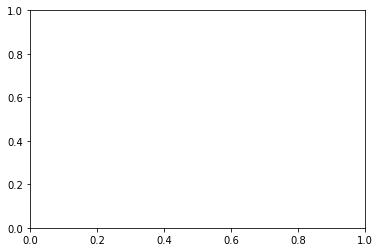

MultiIndex([('U-RW', 'U-SRW')],
           names=['Model 1', 'Model 2'])


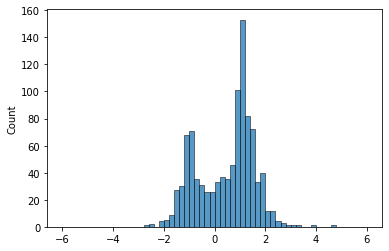

MultiIndex([('U-RW', 'U-ARIMA-F')],
           names=['Model 1', 'Model 2'])


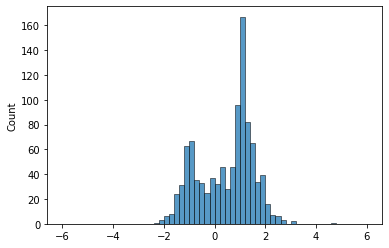

MultiIndex([('U-SRW', 'U-RW')],
           names=['Model 1', 'Model 2'])


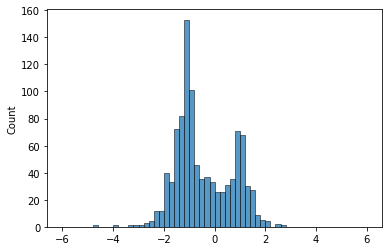

MultiIndex([('U-SRW', 'U-SRW')],
           names=['Model 1', 'Model 2'])


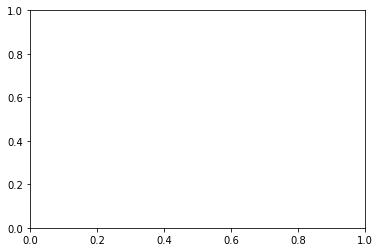

MultiIndex([('U-SRW', 'U-ARIMA-F')],
           names=['Model 1', 'Model 2'])


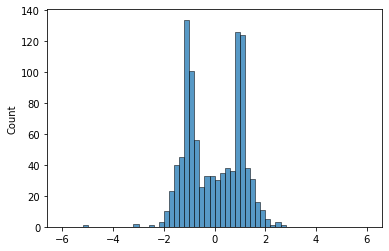

MultiIndex([('U-ARIMA-F', 'U-RW')],
           names=['Model 1', 'Model 2'])


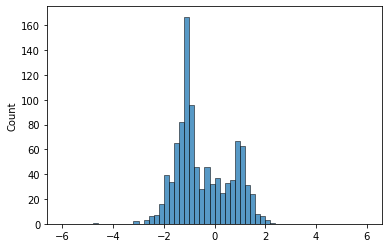

MultiIndex([('U-ARIMA-F', 'U-SRW')],
           names=['Model 1', 'Model 2'])


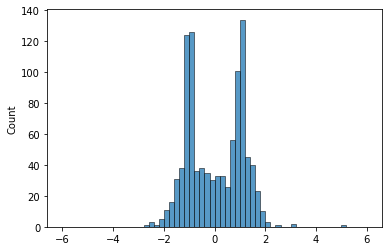

MultiIndex([('U-ARIMA-F', 'U-ARIMA-F')],
           names=['Model 1', 'Model 2'])


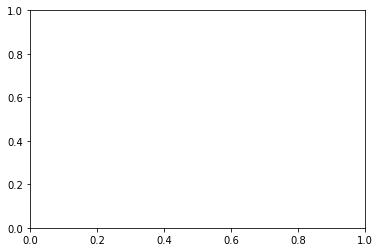

In [8]:
for m1 in model_name_tex[0:3]:
    for m2 in model_name_tex[0:3]:
        single_dm = dm.loc[pd.IndexSlice[m1, m2, :], "DM"]
        dm_score_array = single_dm.values
        pair = single_dm.index.unique()
        sns.histplot(x=dm_score_array, bins='auto', binwidth=0.2, binrange=(-6, 6))
        print(pair)
        plt.show()

In [36]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model1 = len(model_name_tex)
num_model2 = num_model1

# single facet の ax のデザイン
def ax_settings(ax, model_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)

    ax.text(0.02, 0.4, model_name, fontsize=None, fontweight="bold", transform = ax.transAxes) 
    return None

# 画像全体のサイズを指定（縦, 横）。
fig = plt.figure(figsize=(50, 50), dpi=300)

# 全体のGridSpec。
gs = GridSpec(
    nrows=num_model2, 
    ncols=num_model1, 
    width_ratios=[1]*num_model1, 
    height_ratios=[1]*num_model2, 
    wspace=0, 
    hspace=0
    )

# Ridgeline
# ridgeline の数 num_model1 * num_model2 の空 ax リスト を作成
axs = [[None] * num_model2] * num_model1

# Ridgeline の ax をループで作成
for j in range(num_model1):
    for i in range(num_model2):
        axs[i][j] = fig.add_subplot(gs[i, j])
        single_dm = dm.loc[pd.IndexSlice[m1, m2, :], "DM"].values
        sns.histplot(x=single_dm, bins='auto', binwidth=0.2, binrange=(-6, 6))

    # 右以外x軸無し
    if i < (num_model2 - 1): 
        axs[i][j].set_xticks([])
        axs[i][j].set_xlabel("")
    if i == num_model2 - 1:
        axs[i][j].set_xlabel("DM statistics")
    
    # 左以外y軸無し
    if j > 0: 
        axs[i][j].set_yticks([])
        axs[i][j].set_ylabel("")
    if j == 0:
        axs[i][j].set_ylabel("Count")
# set margins https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
plt.show()
plt.savefig("./_dm_mat.pdf")

<Figure size 432x288 with 0 Axes>

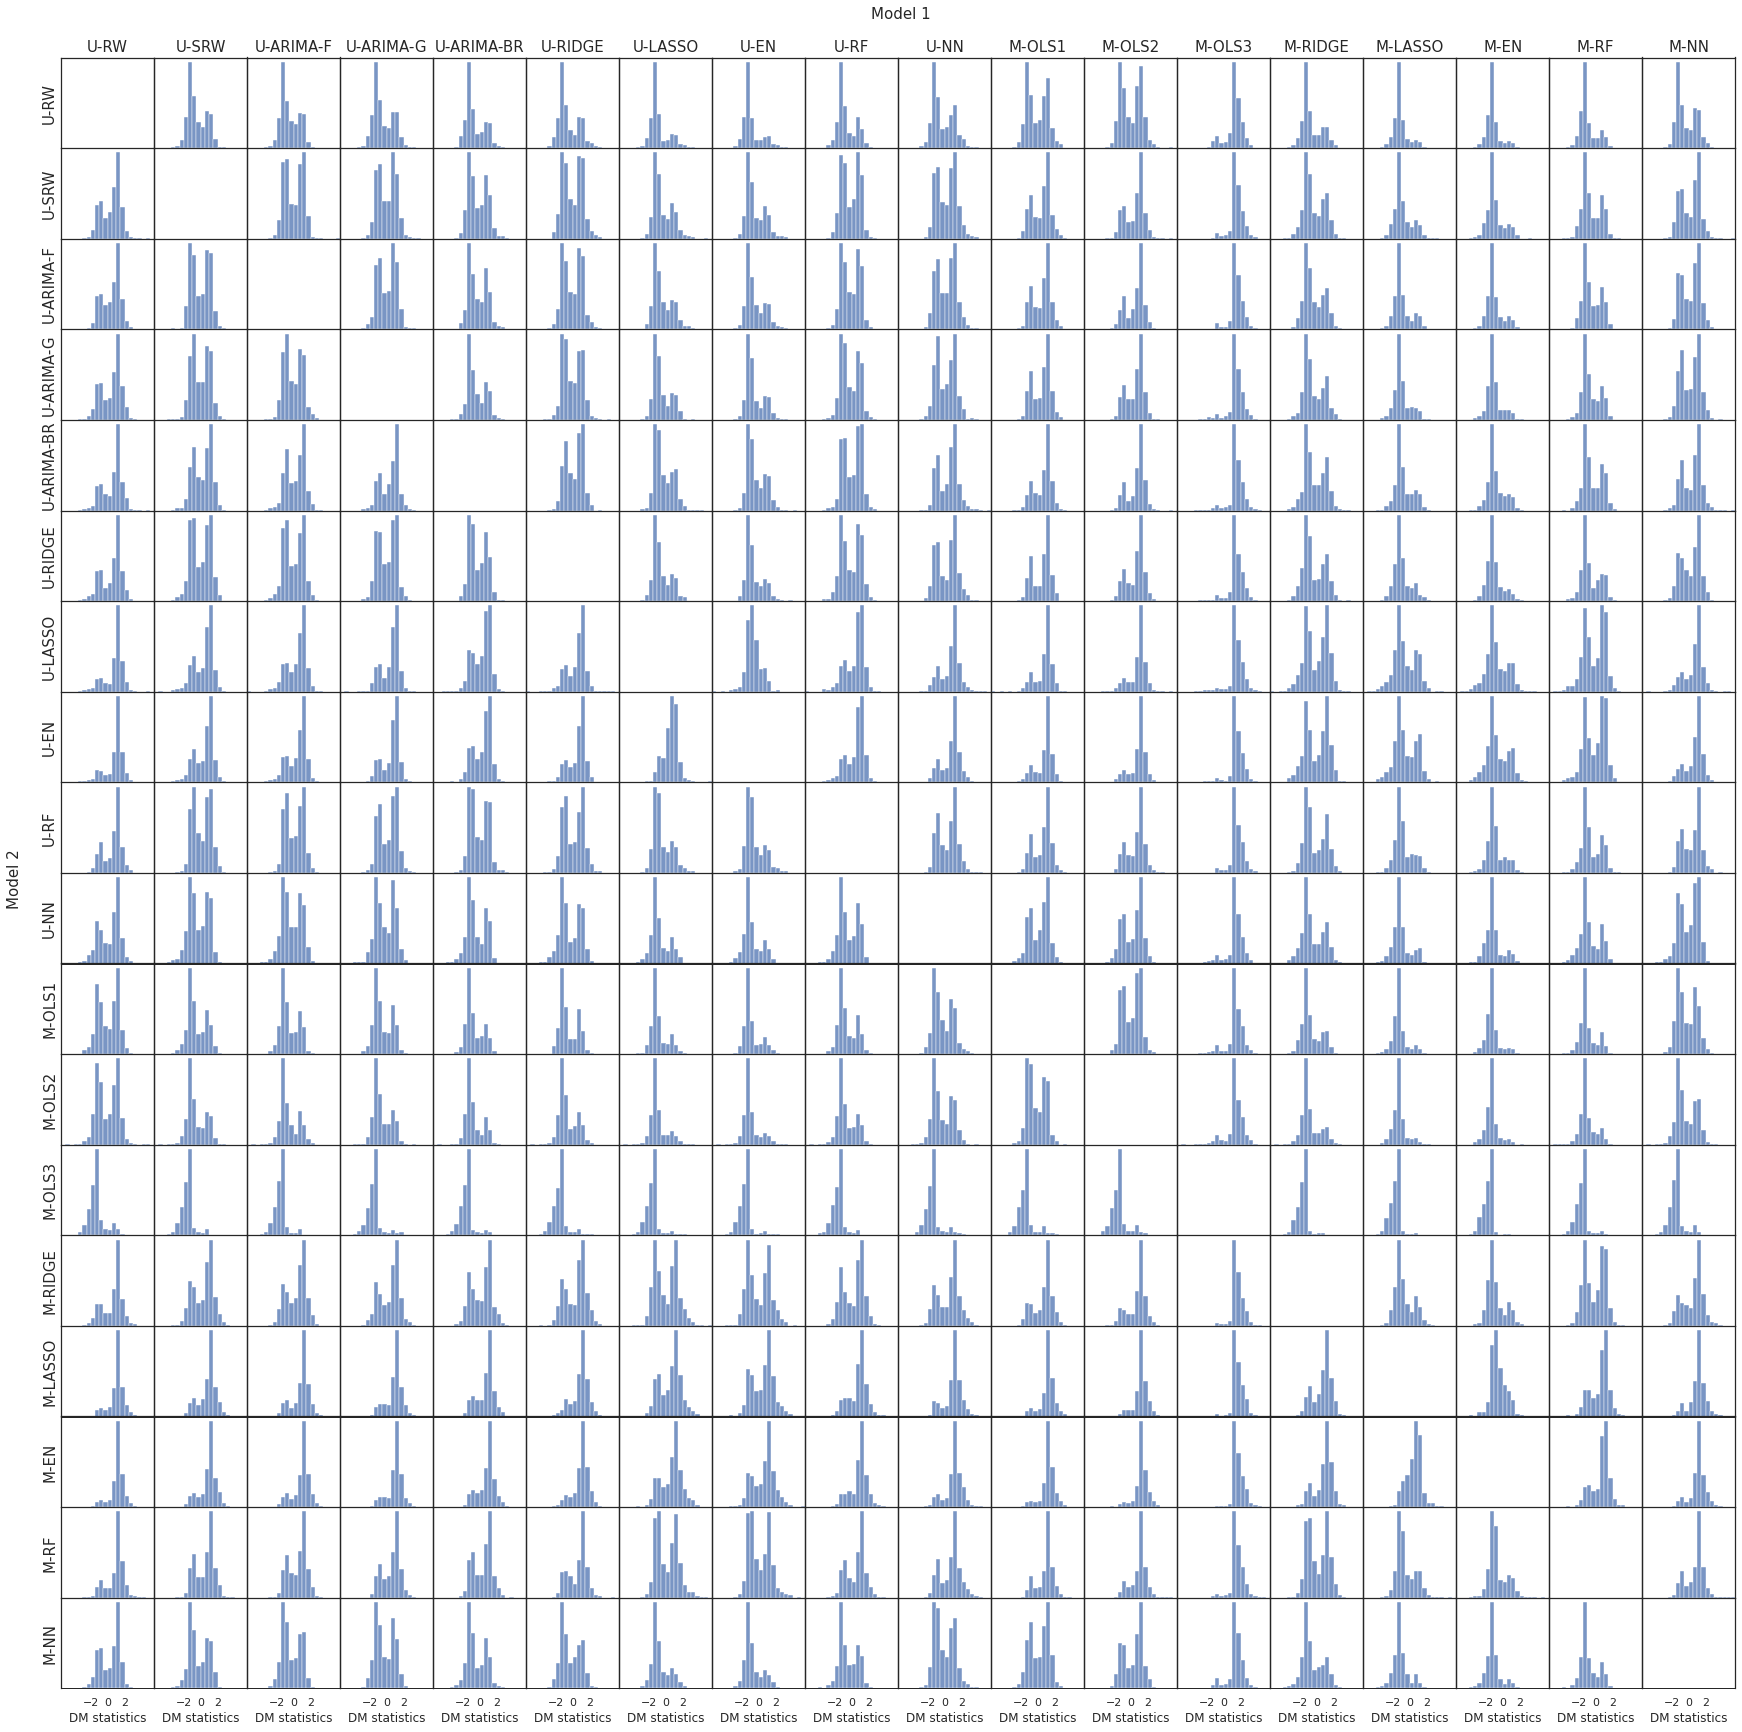

In [12]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model1 = len(model_name_tex)
# num_model1 = 3
num_model2 = num_model1

# single facet の ax のデザイン
def ax_settings(ax, x_min, x_max):
    ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)
    # ax.set_yticks([])

    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)
    return None

label_size = 15

# fig = plt.figure(figsize=(50, 50), dpi=300)
fig = plt.figure(figsize=(30, 30))
gs = GridSpec(
    nrows=num_model2, 
    ncols=num_model1, 
    width_ratios=[1]*num_model1, 
    height_ratios=[1]*num_model2, 
    wspace=0, 
    hspace=0
    )
axs = [[None] * num_model2] * num_model1

for j, m1 in enumerate(model_name_tex):
    for i, m2 in enumerate(model_name_tex):
        # add subplot
        axs[i][j] = fig.add_subplot(gs[i, j])
        ax_settings(axs[i][j],  -5.5, 5.5)
        # extract single pair dm
        single_dm = dm.loc[pd.IndexSlice[m1, m2, :], "DM"]
        dm_score_array = single_dm.values
        sns.histplot(x=dm_score_array, bins='auto', binwidth=0.5, binrange=(-6, 6))
        
        # 上以外タイトル(Model 1)なし
        if i == 0:
            axs[i][j].set_title(m1, fontsize=label_size)
        else:
            pass

        # 下以外x軸無し
        if i == num_model2 - 1:
            axs[i][j].set_xticks([-2.0, 0.0, 2.0])
            axs[i][j].set_xlabel("DM statistics")
        else:
            axs[i][j].set_xticks([])
            axs[i][j].set_xlabel("")

        
        # 左以外タイトル(Model 2)なし
        if j == 0:
            axs[i][j].set_yticks([])
            axs[i][j].set_ylabel(m2, fontsize=label_size)
        else:
            axs[i][j].set_yticks([])
            axs[i][j].set_ylabel("")

fig.text(0.5, 0.90, "Model 1", va="center", fontsize=label_size)
fig.text(0.10, 0.5, "Model 2", rotation="vertical", va="center", fontsize=label_size)

plt.savefig("./_dm_mat_MAE.pdf", bbox_inches='tight')

MAPE

In [7]:
m1_list = [
    'y_hat_rw', 'y_hat_srw', 'y_hat_sarima_f', 'y_hat_sarima_g', 'y_hat_sarima_br', 
    'y_hat_ul2', 'y_hat_ul1', 'y_hat_uen', 'y_hat_uraf', 'y_hat_umlp', 
    'y_hat_ols1', 'y_hat_ols2', 'y_hat_ols3',
    'y_hat_ml2', 'y_hat_ml1', 'y_hat_men', 'y_hat_mraf', 'y_hat_mmlp'
    ]
m2_list = m1_list

dm_score_mat = pd.concat(list(map(lambda m1: dm_integrated_table(m1, m2_list, y_hats_all, crit="MAPE")[0]["DM"], m1_list)))

dm_score_mat.to_csv("./dm_score_mat_mape.csv")
dm_score_mat

pair                              index      
(1) y_hat_rw vs (2) y_hat_rw      あらた           NaN
                                  いすゞ自動車        NaN
                                  いなげや          NaN
                                  かどや製油         NaN
                                  きんでん          NaN
                                                 ..
(1) y_hat_mmlp vs (2) y_hat_mmlp  ＵＡＣＪ          NaN
                                  ＷＤＢホールディングス   NaN
                                  ＷＯＷＯＷ         NaN
                                  ＺＯＺＯ          NaN
                                  ｅＢＡＳＥ         NaN
Name: DM, Length: 324972, dtype: float64

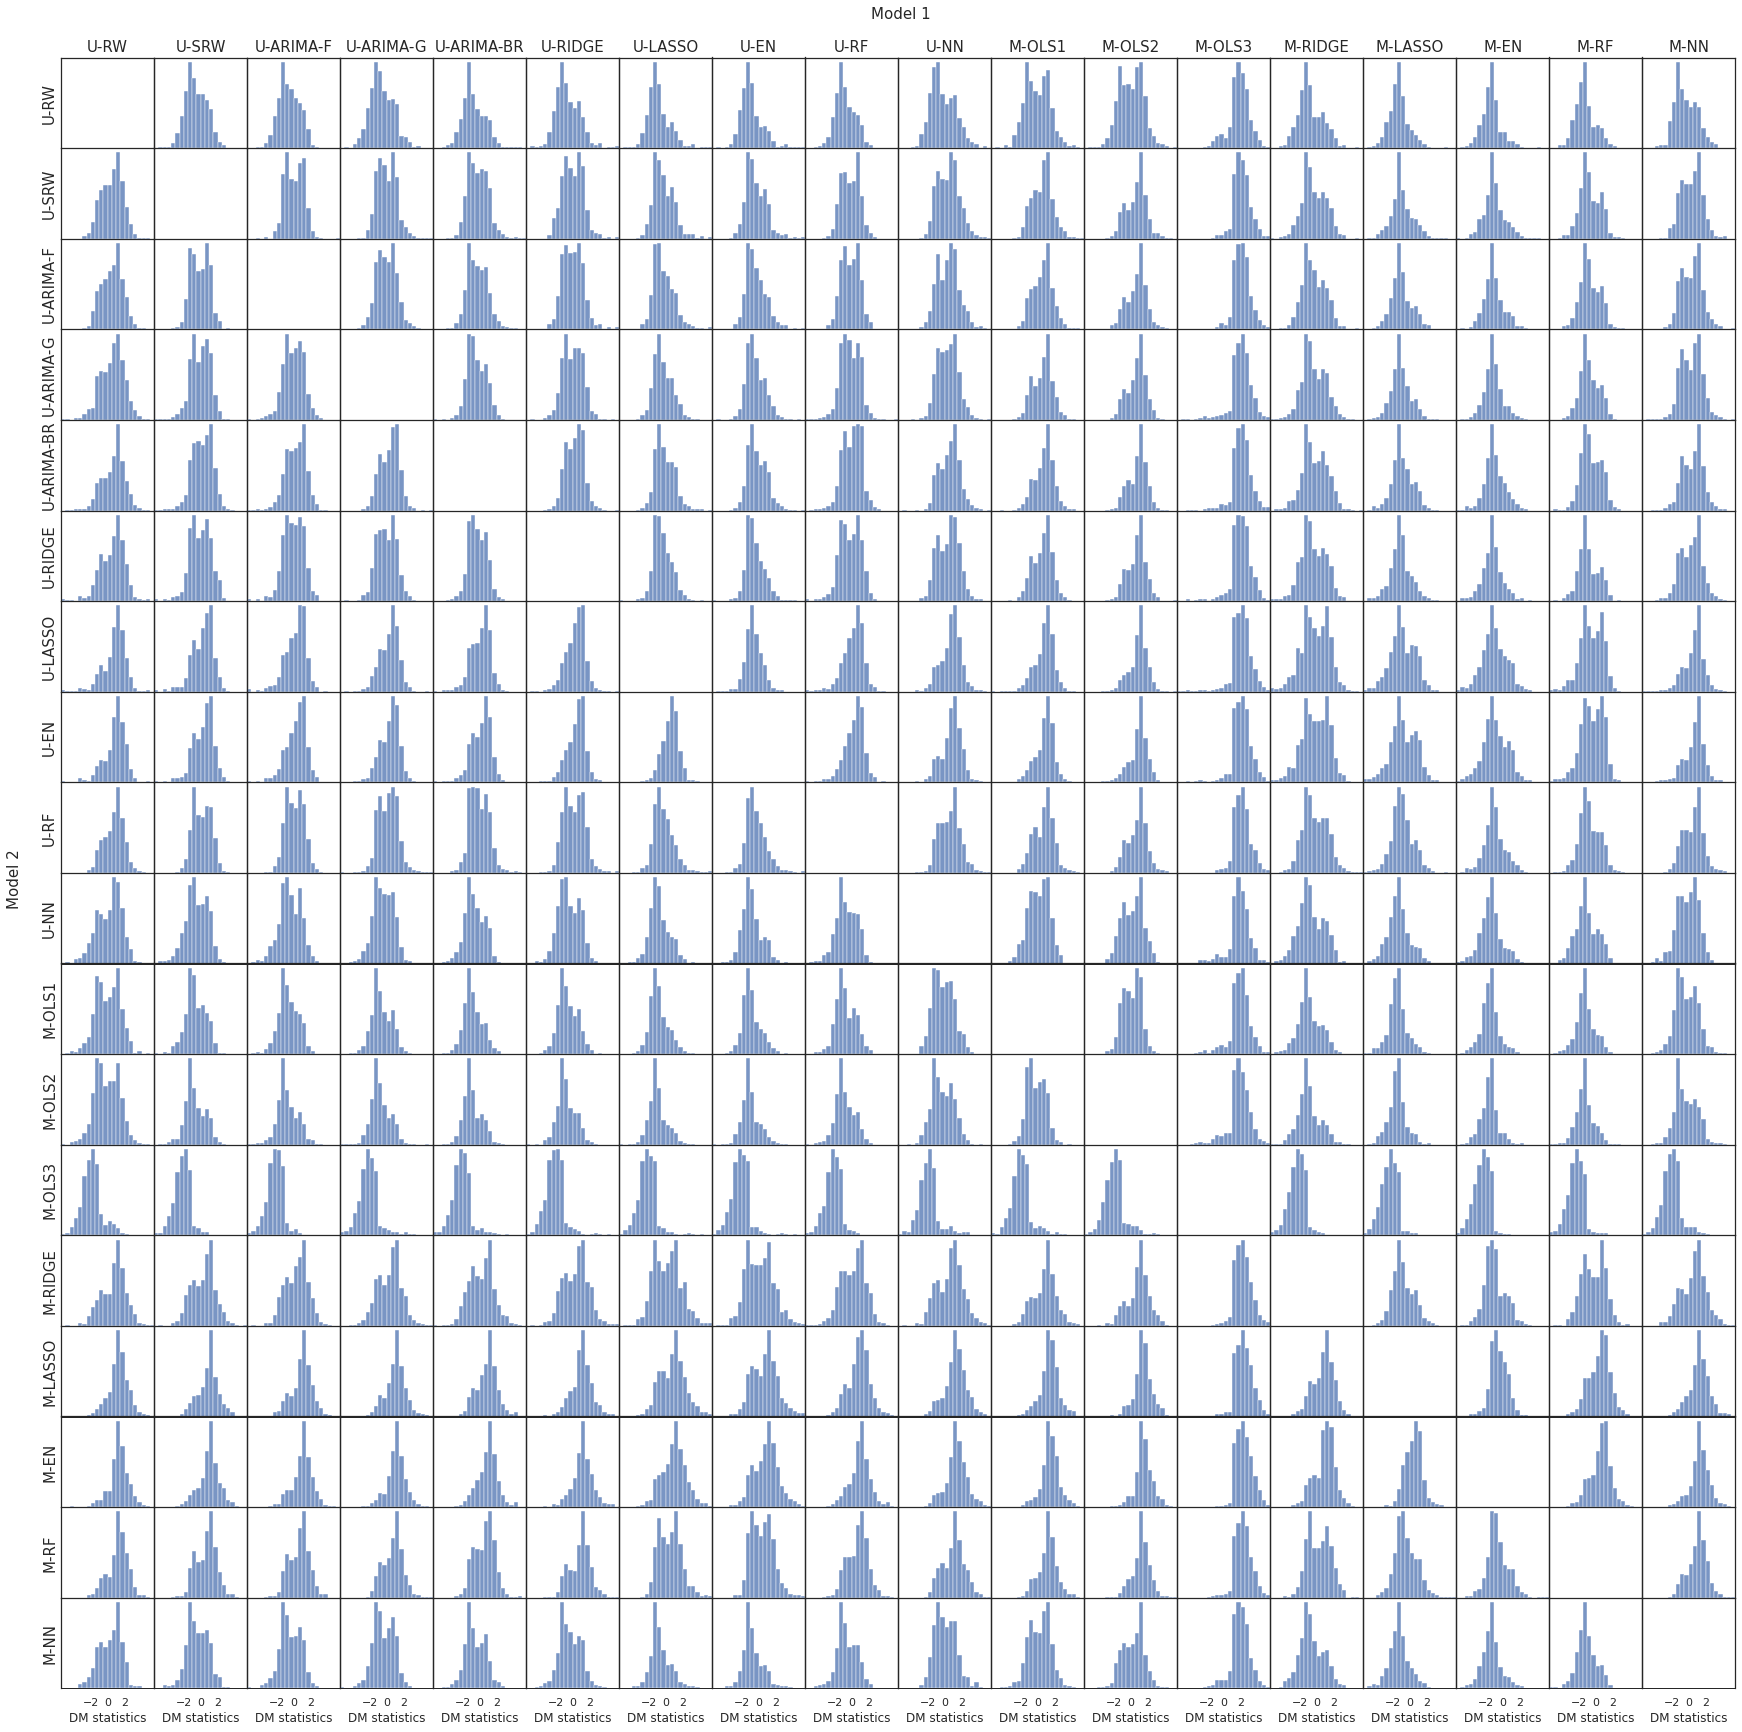

In [16]:
dm = dm_score_mat.reset_index()
dm["Model 1"] = dm["pair"].str.split().apply(lambda x: x[1])
dm["Model 2"] = dm["pair"].str.split().apply(lambda x: x[4])
dm = dm.drop("pair", axis=1)

# replace name
original_name = [
    'y_hat_rw',
    'y_hat_srw',
    'y_hat_sarima_f',
    'y_hat_sarima_g',
    'y_hat_sarima_br',
    'y_hat_ul2',
    'y_hat_ul1',
    'y_hat_uen',
    'y_hat_uraf',
    'y_hat_umlp',
    'y_hat_ols1',
    'y_hat_ols2',
    'y_hat_ols3',
    'y_hat_ml2',
    'y_hat_ml1',
    'y_hat_men',
    'y_hat_mraf',
    'y_hat_mmlp'
    ]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN"
]

dm["Model 1"] = dm["Model 1"].replace(dict(zip(original_name, model_name_tex)))
dm["Model 2"] = dm["Model 2"].replace(dict(zip(original_name, model_name_tex)))
dm = dm.set_index(["Model 1", "Model 2"])

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model1 = len(model_name_tex)
# num_model1 = 3
num_model2 = num_model1

# single facet の ax のデザイン
def ax_settings(ax, x_min, x_max):
    ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)
    # ax.set_yticks([])

    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)
    return None

label_size = 15

# fig = plt.figure(figsize=(50, 50), dpi=300)
fig = plt.figure(figsize=(30, 30))
gs = GridSpec(
    nrows=num_model2, 
    ncols=num_model1, 
    width_ratios=[1]*num_model1, 
    height_ratios=[1]*num_model2, 
    wspace=0, 
    hspace=0
    )
axs = [[None] * num_model2] * num_model1

for j, m1 in enumerate(model_name_tex):
    for i, m2 in enumerate(model_name_tex):
        # add subplot
        axs[i][j] = fig.add_subplot(gs[i, j])
        ax_settings(axs[i][j],  -5.5, 5.5)
        # extract single pair dm
        single_dm = dm.loc[pd.IndexSlice[m1, m2, :], "DM"]
        dm_score_array = single_dm.values
        sns.histplot(x=dm_score_array, bins='auto', binwidth=0.5, binrange=(-6, 6))
        
        # 上以外タイトル(Model 1)なし
        if i == 0:
            axs[i][j].set_title(m1, fontsize=label_size)
        else:
            pass

        # 下以外x軸無し
        if i == num_model2 - 1:
            axs[i][j].set_xticks([-2.0, 0.0, 2.0])
            axs[i][j].set_xlabel("DM statistics")
        else:
            axs[i][j].set_xticks([])
            axs[i][j].set_xlabel("")

        
        # 左以外タイトル(Model 2)なし
        if j == 0:
            axs[i][j].set_yticks([])
            axs[i][j].set_ylabel(m2, fontsize=label_size)
        else:
            axs[i][j].set_yticks([])
            axs[i][j].set_ylabel("")

fig.text(0.5, 0.90, "Model 1", va="center", fontsize=label_size)
fig.text(0.10, 0.5, "Model 2", rotation="vertical", va="center", fontsize=label_size)

plt.savefig("./../../web_appendix/_dm_mat_MAPE.pdf", bbox_inches='tight')

MSPE

In [ ]:
m1_list = [
    'y_hat_rw', 'y_hat_srw', 'y_hat_sarima_f', 'y_hat_sarima_g', 'y_hat_sarima_br', 
    'y_hat_ul2', 'y_hat_ul1', 'y_hat_uen', 'y_hat_uraf', 'y_hat_umlp', 
    'y_hat_ols1', 'y_hat_ols2', 'y_hat_ols3',
    'y_hat_ml2', 'y_hat_ml1', 'y_hat_men', 'y_hat_mraf', 'y_hat_mmlp'
    ]
m2_list = m1_list

dm_score_mat = pd.concat(list(map(lambda m1: dm_integrated_table(m1, m2_list, y_hats_all, crit="MSPE")[0]["DM"], m1_list)))

dm_score_mat.to_csv("./dm_score_mat_mspe.csv")
dm_score_mat

In [ ]:
dm = dm_score_mat.reset_index()
dm["Model 1"] = dm["pair"].str.split().apply(lambda x: x[1])
dm["Model 2"] = dm["pair"].str.split().apply(lambda x: x[4])
dm = dm.drop("pair", axis=1)

# replace name
original_name = [
    'y_hat_rw',
    'y_hat_srw',
    'y_hat_sarima_f',
    'y_hat_sarima_g',
    'y_hat_sarima_br',
    'y_hat_ul2',
    'y_hat_ul1',
    'y_hat_uen',
    'y_hat_uraf',
    'y_hat_umlp',
    'y_hat_ols1',
    'y_hat_ols2',
    'y_hat_ols3',
    'y_hat_ml2',
    'y_hat_ml1',
    'y_hat_men',
    'y_hat_mraf',
    'y_hat_mmlp'
    ]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN"
]

dm["Model 1"] = dm["Model 1"].replace(dict(zip(original_name, model_name_tex)))
dm["Model 2"] = dm["Model 2"].replace(dict(zip(original_name, model_name_tex)))
dm = dm.set_index(["Model 1", "Model 2"])

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model1 = len(model_name_tex)
# num_model1 = 3
num_model2 = num_model1

# single facet の ax のデザイン
def ax_settings(ax, x_min, x_max):
    ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)
    # ax.set_yticks([])

    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)
    return None

label_size = 15

# fig = plt.figure(figsize=(50, 50), dpi=300)
fig = plt.figure(figsize=(30, 30))
gs = GridSpec(
    nrows=num_model2, 
    ncols=num_model1, 
    width_ratios=[1]*num_model1, 
    height_ratios=[1]*num_model2, 
    wspace=0, 
    hspace=0
    )
axs = [[None] * num_model2] * num_model1

for j, m1 in enumerate(model_name_tex):
    for i, m2 in enumerate(model_name_tex):
        # add subplot
        axs[i][j] = fig.add_subplot(gs[i, j])
        ax_settings(axs[i][j],  -5.5, 5.5)
        # extract single pair dm
        single_dm = dm.loc[pd.IndexSlice[m1, m2, :], "DM"]
        dm_score_array = single_dm.values
        sns.histplot(x=dm_score_array, bins='auto', binwidth=0.5, binrange=(-6, 6))
        
        # 上以外タイトル(Model 1)なし
        if i == 0:
            axs[i][j].set_title(m1, fontsize=label_size)
        else:
            pass

        # 下以外x軸無し
        if i == num_model2 - 1:
            axs[i][j].set_xticks([-2.0, 0.0, 2.0])
            axs[i][j].set_xlabel("DM statistics")
        else:
            axs[i][j].set_xticks([])
            axs[i][j].set_xlabel("")

        
        # 左以外タイトル(Model 2)なし
        if j == 0:
            axs[i][j].set_yticks([])
            axs[i][j].set_ylabel(m2, fontsize=label_size)
        else:
            axs[i][j].set_yticks([])
            axs[i][j].set_ylabel("")

fig.text(0.5, 0.90, "Model 1", va="center", fontsize=label_size)
fig.text(0.10, 0.5, "Model 2", rotation="vertical", va="center", fontsize=label_size)

plt.savefig("./../../web_appendix/_dm_mat_MSPE.pdf", bbox_inches='tight')